In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import sys
import os

# circumvent src import errors
sys.path.append(os.path.abspath('..'))

from src.data import data
from src.features import preprocessing
from src.utilities import utilities
from pprint import pprint

##### Loading the raw dataset

In [2]:
relevant_cols = ['asin', 'overall', 'verified', 'reviewerID', 'reviewText']
movies_raw = pd.read_csv("../data/raw/Movies_and_TV_5.csv")
# need to drop all null values in reviews
movies_raw.dropna(axis=0, subset=['reviewText'], inplace=True)

# summary statistics
utilities.summary_statistics(movies_raw)
movies_raw.head()

/Users/jensen/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The dataframe consists of 3408421 rows and 12 columns
The number of unique reviewerID: 297491
The number of unique reviewText: 2645764
The number of unique asin: 60175


,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5.0,True,"11 9, 2012",A2M1CU2IRZG0K9,0005089549,{'Format:': ' VHS Tape'},Terri,So sorry I didn't purchase this years ago when...,Amazing!,1352419200,NaN,NaN
1,5.0,True,"12 30, 2011",AFTUJYISOFHY6,0005089549,{'Format:': ' VHS Tape'},Melissa D. Abercrombie,Believe me when I tell you that you will recei...,Great Gospel VHS of the Cathedrals!,1325203200,NaN,NaN
2,5.0,True,"04 21, 2005",A3JVF9Y53BEOGC,000503860X,{'Format:': ' DVD'},Anthony Thompson,"I have seen X live many times, both in the ear...",A great document of a great band,1114041600,11,NaN
3,5.0,True,"04 6, 2005",A12VPEOEZS1KTC,000503860X,{'Format:': ' DVD'},JadeRain,"I was so excited for this! Finally, a live co...",YES!! X LIVE!!,1112745600,5,NaN
4,5.0,True,"12 3, 2010",ATLZNVLYKP9AZ,000503860X,{'Format:': ' DVD'},T. Fisher,X is one of the best punk bands ever. I don't ...,X have still got it,1291334400,5,NaN


##### Loading the merged dataset 

In [3]:
relevant_cols = ['title', 'description', 'details', 'asin', 'overall', 'verified', 'reviewerID', 'reviewText']
movies_merged = pd.read_csv("../data/interim/Movies_and_TV_merged.csv", usecols=relevant_cols)

# summary statistics
utilities.summary_statistics(movies_merged)
movies_merged.head()

/Users/jensen/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The dataframe consists of 1672887 rows and 8 columns
The number of unique reviewerID: 227647
The number of unique reviewText: 1606801
The number of unique asin: 59750


,description,title,asin,details,overall,verified,reviewerID,reviewText
0,['Barefoot Contessa Volume 2: On these three d...,"Barefoot Contessa (with Ina Garten), Entertain...",0000143588,NaN,5.0,True,AVIY68KEPQ5ZD,I am very pleased with the dvd only wish i cou...
1,['Barefoot Contessa Volume 2: On these three d...,"Barefoot Contessa (with Ina Garten), Entertain...",0000143588,NaN,5.0,True,A3MP1M1DWO836V,I love Ina Garten and I was so happy that they...
2,['Barefoot Contessa Volume 2: On these three d...,"Barefoot Contessa (with Ina Garten), Entertain...",0000143588,NaN,5.0,True,A2MSEN5APH6E6L,I cannot say enough good things about this DVD...
3,['Barefoot Contessa Volume 2: On these three d...,"Barefoot Contessa (with Ina Garten), Entertain...",0000143588,NaN,5.0,True,A3MP1M1DWO836V,Great dvd of one of my favorite cooking shows....
4,['Barefoot Contessa Volume 2: On these three d...,"Barefoot Contessa (with Ina Garten), Entertain...",0000143588,NaN,5.0,True,A3MP1M1DWO836V,I wish she would release more DVDs. These are...


##### Creating `Verified` and `Unverified` Split

In [4]:
movies_verified, movies_unverified = data.make_dataset(movies_merged)

# summary statistics
print("Statistics for `Verified` reviews:")
utilities.summary_statistics(movies_verified)
print("\n")
print("Statistics for `Unverified` reviews:")
utilities.summary_statistics(movies_unverified)

Statistics for `Verified` reviews:
The dataframe consists of 1053985 rows and 8 columns
The number of unique reviewerID: 205872
The number of unique reviewText: 1012823
The number of unique asin: 57512


Statistics for `Unverified` reviews:
The dataframe consists of 618902 rows and 8 columns
The number of unique reviewerID: 109898
The number of unique reviewText: 594194
The number of unique asin: 51361


##### Loading product metadata

In [5]:
movies_metadata = pd.read_csv("../data/interim/meta_Movies_and_TV.csv", usecols=['title', 'description', 'asin', 'price'])

# summary statistics
utilities.summary_statistics(movies_metadata, cols=['asin'])
movies_metadata.head()

The dataframe consists of 181839 rows and 4 columns
The number of unique asin: 181839


,description,title,price,asin
0,[],Understanding Seizures and Epilepsy,NaN,0000695009
1,[],Spirit Led&mdash;Moving By Grace In The Holy S...,NaN,0000791156
2,['Disc 1: Flour Power (Scones; Shortcakes; Sou...,My Fair Pastry (Good Eats Vol. 9),NaN,0000143529
3,['Barefoot Contessa Volume 2: On these three d...,"Barefoot Contessa (with Ina Garten), Entertain...",$74.95,0000143588
4,['Rise and Swine (Good Eats Vol. 7) includes b...,Rise and Swine (Good Eats Vol. 7),NaN,0000143502


### 1. Exploratory Data Analysis

##### What is the global average rating, per product, per reviewer?

In [6]:
reviews_df = [movies_raw, movies_merged, movies_verified, movies_unverified]

In [7]:
for df in reviews_df:
    utilities.reviews_count(df)

Global average ratings: 4.221144042945399
For product reviews:
Minimum reviews for product: 1, Maximum reviews for products: 7189
Average reviews per products: 56.64181138346489
The interquartile range:
0.25     8.0
0.50    16.0
0.75    40.0
Name: reviewText, dtype: float64

For user reviews:
Minimum reviews for users: 1, Maximum reviews for users: 3509
Average reviews per users: 11.457223916017627
The interquartile range:
0.25     5.0
0.50     7.0
0.75    11.0
Name: reviewText, dtype: float64

Global average ratings: 4.095759008229486
For product reviews:
Minimum reviews for product: 1, Maximum reviews for products: 3040
Average reviews per products: 27.998108786610878
The interquartile range:
0.25     5.0
0.50     9.0
0.75    21.0
Name: reviewText, dtype: float64

For user reviews:
Minimum reviews for users: 1, Maximum reviews for users: 1972
Average reviews per users: 7.348601123669541
The interquartile range:
0.25    3.0
0.50    5.0
0.75    7.0
Name: reviewText, dtype: float64

Glo

##### Computing average rating per product

In [8]:
prod_ratings = []

for df in reviews_df:
    ratings = preprocessing.compute_mean_ratings(df, 'reviewText', 'overall')
    prod_ratings.append(ratings)
    
print(len(prod_ratings))

4


In [9]:
prod_ratings_raw, prod_ratings_merged, prod_ratings_verified, prod_ratings_unverified = prod_ratings

In [51]:
for rating in prod_ratings:
    print("==========")
    print(f"Average of average ratings: {rating['rating_average'].mean()}")
    print(rating.sort_values(['rating_average'], ascending=False).head(10))
    print("\n")

Average of average ratings: 4.131229554799301
             asin  rating_counts  rating_average  rating_weighted
0      0000143588              5             5.0         4.227760
28158  B000WH5AW4              6             5.0         4.244547
28175  B000WM8IGY              1             5.0         4.152419
50956  B00FBRCY06             12             5.0         4.331715
39616  B004D2GMSU             11             5.0         4.318611
39609  B004CZZZVS              5             5.0         4.227760
39592  B004CZZYZ0              5             5.0         4.227760
39584  B004CZRDWC              5             5.0         4.227760
39573  B004CYVZ22              5             5.0         4.227760
15463  B0000EMYBQ              8             5.0         4.276025


Average of average ratings: 4.031798135812332
             asin  rating_counts  rating_average  rating_weighted
0      0000143588              5             5.0         4.217991
40583  B004WKRQTM              5             5.0

Based on the output, you observed that for all the Top 10 product average ratings obtained across all 4 different variation of the dataset, all 4 dataframe has shown that the top 10 products (with 5.0 ratings) are all products with little reviews (< 50).

Consider this, if we were to recommend such products to others soley because the fact that they obtained an average rating of 5.0, we may be "*inaccurately*" recommending such items as they might just be relative new items that has not been thorough ordered and used by the wider consumer base on the platform.

Hence, we will need devised a rating that is more concrete and can factor in a threshold amount of ratings required for a product to get listed on the `product ranking`. This provides a more balance look to the ratings of a product as we now consider the global settings.

In [11]:
def compute_weighted_ratings(df, count_col, avg_rating_col, threshold=.75):
    """Computes weighted ratings based on number of ratings and average rating.

        Args:
            df [pd.DataFrame]: DataFrame consisting both rating counts and average rating.
            count_col [str]: Column name for number of ratings.
            avg_rating_col [str]: Column name for average rating.
            threshold [float]: Threshold for minimum of ratings/reviews to qualify for ranking.
        Returns:
            df [pd.DataFrame]: DataFrame with newly computed weighted ratings
    """

    m = df[count_col].quantile(threshold)
    C = df[avg_rating_col].mean()    # global average rating

    df['rating_weighted'] = (df.apply(lambda x: ((x[count_col]/(x[count_col] + m)
                                                  * x[avg_rating_col])
                                                 + (m/(m + x[count_col]) * C)), axis=1)
                            )

    return df

In [34]:
computed_prod_ratings = []

for rating in prod_ratings:
    computed_ratings = preprocessing.compute_weighted_ratings(rating, 'rating_counts', 'rating_average')
    computed_prod_ratings.append(computed_ratings)
    print("==========")
    print(f"Weighted Average Ratings: {computed_ratings['rating_weighted'].mean()}")
    print(computed_ratings.sort_values('rating_weighted', ascending=False).head(10))
    print("\n")

Weighted Average Ratings: 4.145024217169458
             asin  rating_counts  rating_average  rating_weighted
13026  B00006CXSS           5712        4.885679         4.880433
57345  B00YSG2ZPA           5748        4.885525         4.880313
28597  B000Y5JFNY            720        4.905556         4.864802
54502  B00MO21WAY            817        4.888617         4.853266
18714  B0007Y08P6            469        4.914712         4.853142
17214  B0002NY8PI            992        4.878024         4.849079
30218  B00151QYYE            263        4.939163         4.832506
168    0782010792           1236        4.851942         4.829349
19526  B0009UC7MK            430        4.893023         4.828190
46414  B009AF5OY8           1167        4.850900         4.827050


Weighted Average Ratings: 4.04423394238819
             asin  rating_counts  rating_average  rating_weighted
12999  B00006CXSS           2497        4.891069         4.883903
56993  B00YSG2ZPA           2515        4.890258     

In [31]:
def retrieve_product_metadata(asin, metadata):
    """Retrieve product metadata based on product id (asin).
    """
    prod_details = metadata[metadata['asin'] == asin]
    print(f"ASIN: {asin}, Title: {prod_details['title'].values} is ${prod_details['price'].values}")

In [32]:
for rating in computed_prod_ratings:
    top_5 = rating.sort_values('rating_weighted', ascending=False).head(5)['asin'].tolist()
    print("==========")
    for asin in top_5:
        retrieve_product_metadata(asin, movies_metadata)
    print("\n")

ASIN: B00006CXSS, Title: ['Band Of Brothers (DVD)'] is $[nan]
ASIN: B00YSG2ZPA, Title: ['Band of Brothers(Elite SC/BD+DCExp12-21)'] is $['$25.16']
ASIN: B000Y5JFNY, Title: ['The Sound of Music'] is $['$74.47']
ASIN: B00MO21WAY, Title: ['Masterpiece: Downton Abbey Season 5'] is $['$16.71']
ASIN: B0007Y08P6, Title: ['The Andy Griffith Show - The Complete Second Season'] is $['$20.00']


ASIN: B00006CXSS, Title: ['Band Of Brothers (DVD)'] is $[nan]
ASIN: B00YSG2ZPA, Title: ['Band of Brothers(Elite SC/BD+DCExp12-21)'] is $['$25.16']
ASIN: B0002NY8PI, Title: ['The Andy Griffith Show - The Complete First Season'] is $['$24.12']
ASIN: B001FB4VXU, Title: [' The Big Bang Theory'] is $['$14.59']
ASIN: B00BIR2A3E, Title: ['Call the Midwife: Season 2'] is $['$20.09']


ASIN: B00YSG2ZPA, Title: ['Band of Brothers(Elite SC/BD+DCExp12-21)'] is $['$25.16']
ASIN: B00006CXSS, Title: ['Band Of Brothers (DVD)'] is $[nan]
ASIN: 6300215695, Title: ['White Christmas VHS'] is $['$9.49']
ASIN: B001UHOWX8, Titl

##### What are the statistics on ratings?

In [67]:
def rating_summary_statistics(df, cols=['rating_average', 'rating_weighted']):
    print("==========")
    print(f"For average of average ratings:")
    print(f"\tThe mean ratings per product is: {df['rating_average'].mean():.3f}")
    print(f"\tThe median ratings per product is: {df['rating_average'].quantile(.5):.3f}")
    print(f"\tThe 25th and 75th percentile of number of reviews is: "
      f"{df['rating_average'].quantile(.25):.3f} and "
      f"{df['rating_average'].quantile(.75):.3f} respectively.")
    print(f"For weighted average ratings:")
    print(f"\tThe mean ratings per product is: {df['rating_weighted'].mean():.3f}")
    print(f"\tThe median ratings per product is: {df['rating_weighted'].quantile(.5):.3f}")
    print(f"\tThe 25th and 75th percentile of number of reviews is: "
      f"{df['rating_weighted'].quantile(.25):.3f} and "
      f"{df['rating_weighted'].quantile(.75):.3f} respectively.")
    print("\n")
          
def plot_ratings(df, cols=['rating_average', 'rating_weighted']):
    fig, axes = plt.subplots(1, 2, figsize=(12,6))
    fig.suptitle("Average Ratings vs Weighted Ratings")
    for idx, col in enumerate(cols):
          df[col].hist(ax=axes[idx])
    plt.show()

In [60]:
for rating in computed_prod_ratings:
    rating_summary_statistics(rating)

For average of average ratings:
	The mean ratings per product is: 4.131
	The median ratings per product is: 4.293
	The 25th and 75th percentile of number of reviews is: 3.800 and 4.625 respectively.
For weighted average ratings:
	The mean ratings per product is: 4.145
	The median ratings per product is: 4.172
	The 25th and 75th percentile of number of reviews is: 4.048 and 4.270 respectively.


For average of average ratings:
	The mean ratings per product is: 4.032
	The median ratings per product is: 4.200
	The 25th and 75th percentile of number of reviews is: 3.645 and 4.592 respectively.
For weighted average ratings:
	The mean ratings per product is: 4.044
	The median ratings per product is: 4.073
	The 25th and 75th percentile of number of reviews is: 3.922 and 4.189 respectively.


For average of average ratings:
	The mean ratings per product is: 4.140
	The median ratings per product is: 4.333
	The 25th and 75th percentile of number of reviews is: 3.800 and 4.717 respectively.
For w

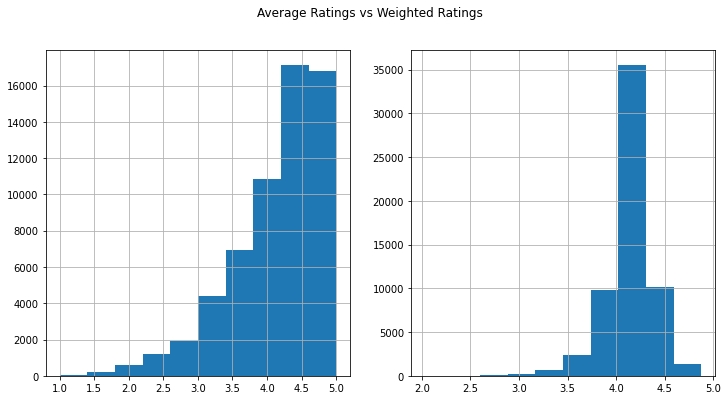

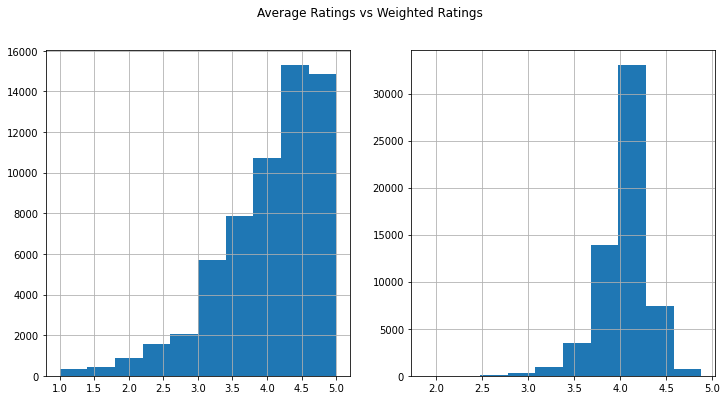

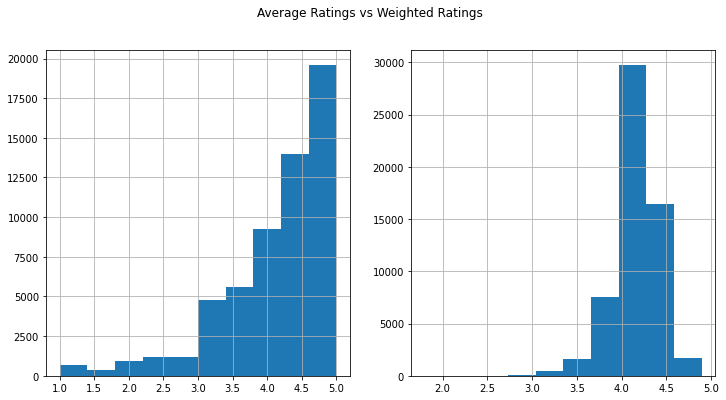

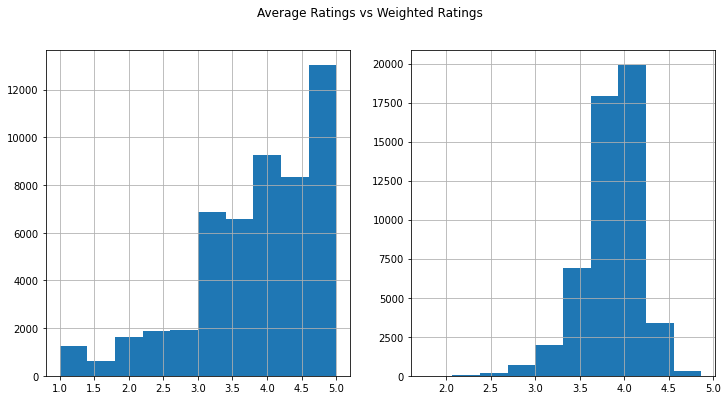

In [68]:
for rating in computed_prod_ratings:
    plot_ratings(rating)